In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from graph_functions import *
from timeit import default_timer as timer
from typing import List, Dict

### Complete Graph

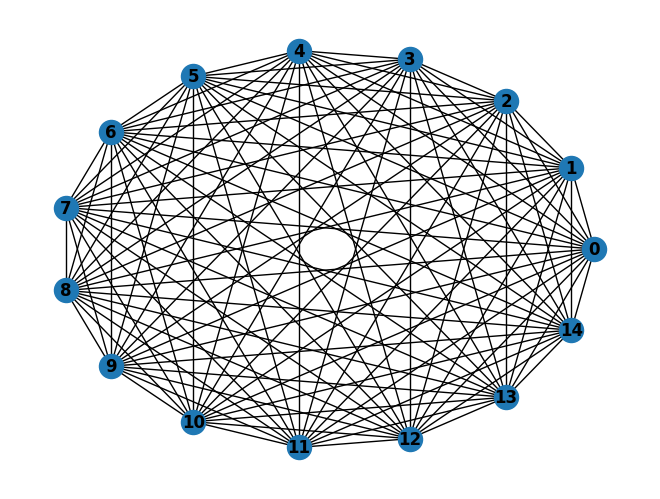

In [2]:
G1 = nx.complete_graph(15)

nx.draw_circular(G1, with_labels=True, font_weight="bold")
plt.show()

### Manual complete graph

Graph is complete


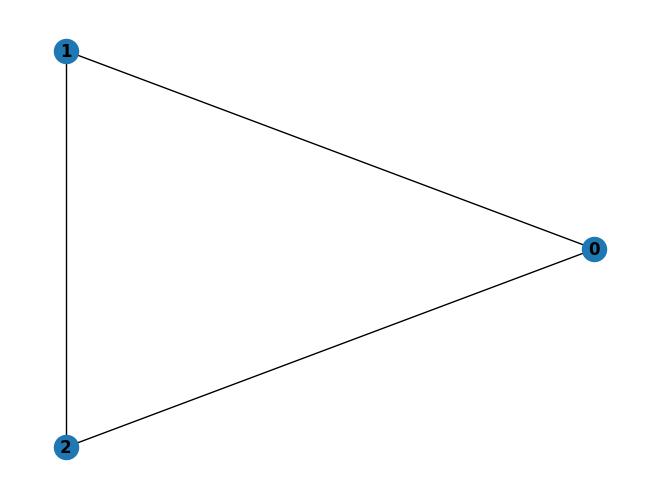

In [ ]:
G2 = nx.Graph()
# Knoten
vertacies = 3


for i in range(vertacies):
    for k in range(vertacies):
        if i == k:
            continue
        G2.add_edge(i, k)
nx.draw_circular(G2, with_labels=True, font_weight="bold")

complete_vertacies: int = (vertacies * (vertacies - 1)) / 2
if complete_vertacies == G2.size():
    print("Graph is complete")


nx.shortest_path_length(G2)
# print(G2.size())
# print(complete_vertacies)

### DiGraph (gerichtete Kanten)

['A', 'B', 'C', 'D', 'E']
[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('D', 'B')]


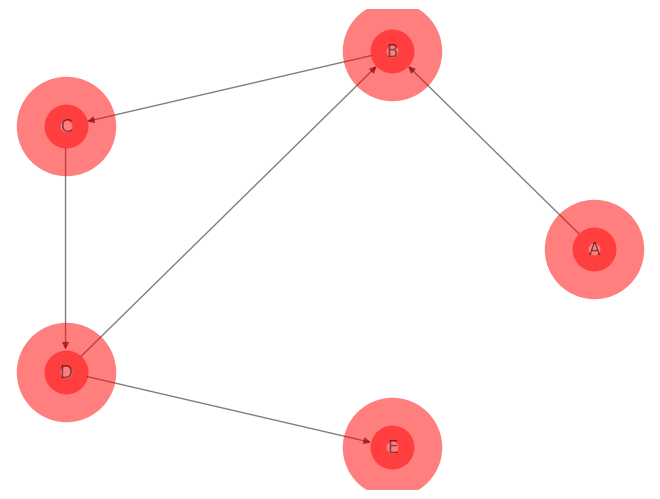

{'C', 'B', 'D', 'E', 'A'}


In [4]:
G3 = nx.DiGraph()
G3.add_node("A")
G3.add_node("B")
G3.add_node("C")
G3.add_node("D")
G3.add_node("E")
print(G3.nodes())

G3.add_edge("A", "B")
G3.add_edge("B", "C")
G3.add_edge("C", "D")
G3.add_edge("D", "E")
G3.add_edge("D", "B")
print(G3.edges())

nx.draw_circular(
    G3,
    with_labels=True,
    node_size=1000,
    node_color="red",
    node_shape="o",
    linewidths=40,
    alpha=0.5,
)
plt.show()


def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen


print(reachable_nodes(G3, "A"))

### Erdos-Renyi-Graph

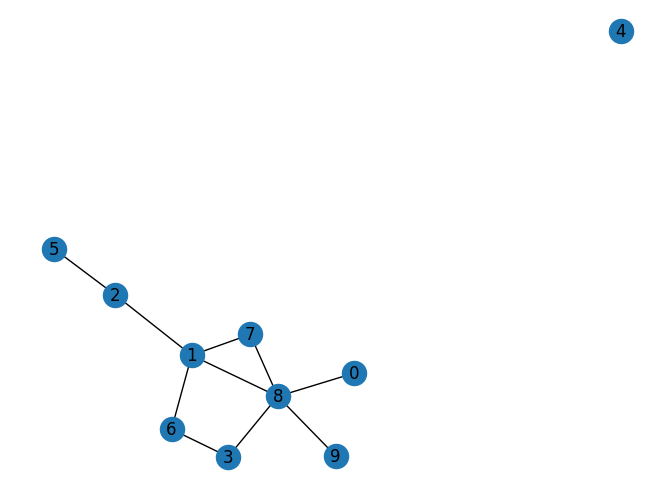

In [5]:
G4 = nx.erdos_renyi_graph(10, 0.2)

nx.draw(G4, with_labels=True)
plt.show()

### Uebungen 1.

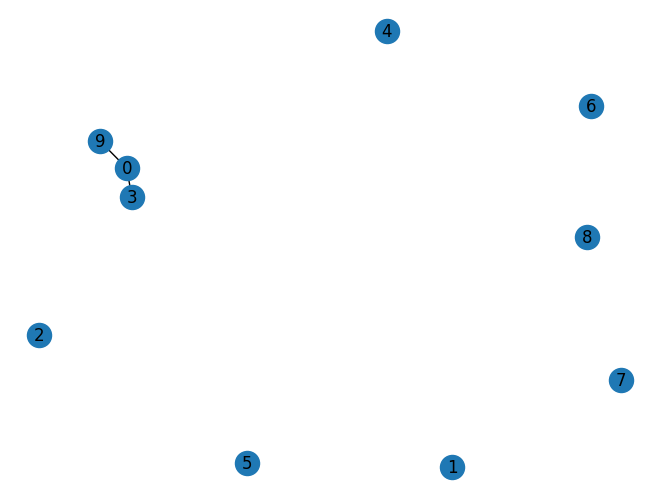

In [6]:
# c
G5 = generate_er_graph_manually(10, 0.1)

nx.draw(G5, with_labels=True)
plt.show()

#### Measure time own/built-in generation function

In [7]:
auto_er_times: list = []
manual_er_times: list = []
auto_er_edge_counts: list = []
manual_er_edge_counts: list = []
n_reps = 10
n_nodes = 200
p_min = 0.2

for i in range(n_reps):
    start = timer()
    G_temp = nx.erdos_renyi_graph(n_nodes, p_min)
    end = timer()
    auto_er_times.append(end - start)
    auto_er_edge_counts.append(len(G_temp.edges))

for i in range(n_reps):
    start = timer()
    G_temp = generate_er_graph_manually(n_nodes, p_min)
    end = timer()
    manual_er_times.append(end - start)
    manual_er_edge_counts.append(len(G_temp.edges))  # edge count


# evaluation time
print(
    "Auto ER times [sum / avg in s]:",
    sum(auto_er_times),
    sum(auto_er_times) / len(auto_er_times),
)
print(
    "Manual ER times [sum / avg in s]:",
    sum(manual_er_times),
    sum(manual_er_times) / len(manual_er_times),
)

# evaluation generation
print(
    "Avg Auto ER edge counts:",
    sum(auto_er_edge_counts) / n_reps,
)
print(
    "Avg Manual ER edge counts:",
    sum(manual_er_edge_counts) / n_reps,
)

Auto ER times [sum / avg in s]: 0.5560692999998764 0.05560692999998764
Manual ER times [sum / avg in s]: 1.137830400000098 0.1137830400000098
Avg Auto ER edge counts: 3976.5
Avg Manual ER edge counts: 3975.3


#### Measure connectivity own/built-in generation function

Avg edge counts for p = 0.0: 0.0
Avg edge counts for p = 0.1: 4.0
Avg edge counts for p = 0.2: 11.0
Avg edge counts for p = 0.3: 10.0
Avg edge counts for p = 0.4: 16.0
Avg edge counts for p = 0.5: 21.0
Avg edge counts for p = 0.6: 24.0
Avg edge counts for p = 0.7: 31.0
Avg edge counts for p = 0.8: 34.0
Avg edge counts for p = 0.9: 39.0
Avg edge counts for p = 1.0: 45.0


Text(0.5, 1.0, 'Average edge counts for different chances of edge building')

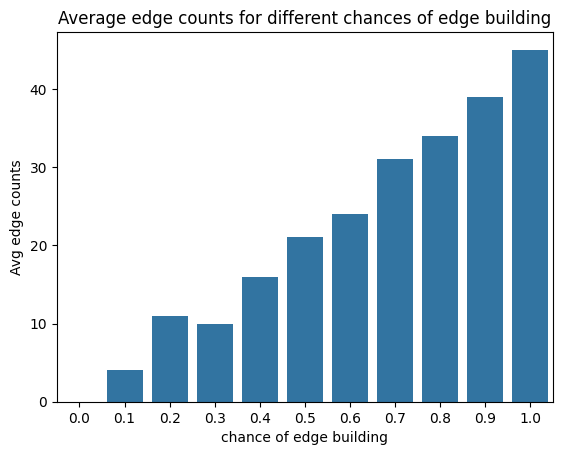

In [8]:
n_nodes = 10
p_min = 0.1
n_reps_per_10_percent = 1

# Dict with keys as p values and values as list of maximum edge counts
edge_counts: Dict[float, List[int]] = {}

# For each 10 percent do n_reps_per_10_percent repetitions of generating and evaluating edge counts for the graphs
for p in range(0, 101, 10):
    edge_counts[p / 100] = []
    for i in range(n_reps_per_10_percent):
        G_temp = generate_er_graph_manually(n_nodes, p / 100)
        edge_counts[p / 100].append(len(G_temp.edges))

    # print the average edge counts for each p value
    print(
        f"Avg edge counts for p = {p / 100}:",
        sum(edge_counts[p / 100]) / len(edge_counts[p / 100]),
    )

# plot as bar plot with seaborn.
sns.barplot(
    x=list(edge_counts.keys()),
    y=[sum(values) / len(values) for values in edge_counts.values()],
)
plt.xlabel("chance of edge building")
plt.ylabel("Avg edge counts")
plt.title("Average edge counts for different chances of edge building")

testing the generation with a half matrix

In [9]:
n = 11
mylist = [[0 for k in range(n)] for i in range(n)]
# initialize as 10 x 10 list

for i in range(n):
    for k in range(1 + i, n):
        mylist[i][k] = 1

mylist

[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

### Aufgabe 2 - Ring Lattice

k nearest nodes: [8, 9, 2, 1]
reachable: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


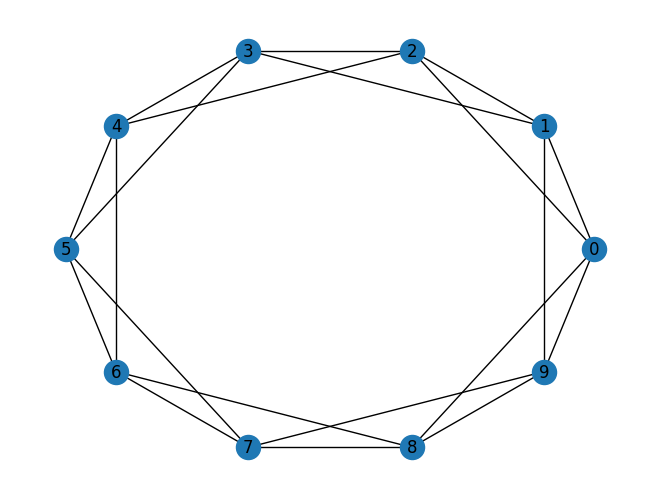

In [10]:
G6 = generate_ring_lattice(10)
print("k nearest nodes:", get_nearest_nodes(G6, 0, 4))
print("reachable:", reachable_nodes(G6, 0))

nx.draw_circular(G6, with_labels=True)
plt.show()

Node: 0 Nearest nodes: [8, 9] Total node count: 10 Degree: 4
Node: 1 Nearest nodes: [9, 3] Total node count: 10 Degree: 4
Node: 2 Nearest nodes: [4, 3] Total node count: 10 Degree: 4
Node: 3 Nearest nodes: [5, 4] Total node count: 10 Degree: 4
Node: 4 Nearest nodes: [6, 5] Total node count: 10 Degree: 4
Node: 5 Nearest nodes: [7, 6] Total node count: 10 Degree: 4
Node: 6 Nearest nodes: [8, 7] Total node count: 10 Degree: 4
Node: 7 Nearest nodes: [9, 8] Total node count: 10 Degree: 4
Node: 8 Nearest nodes: [9, 7] Total node count: 10 Degree: 4
Node: 9 Nearest nodes: [8, 7] Total node count: 10 Degree: 4


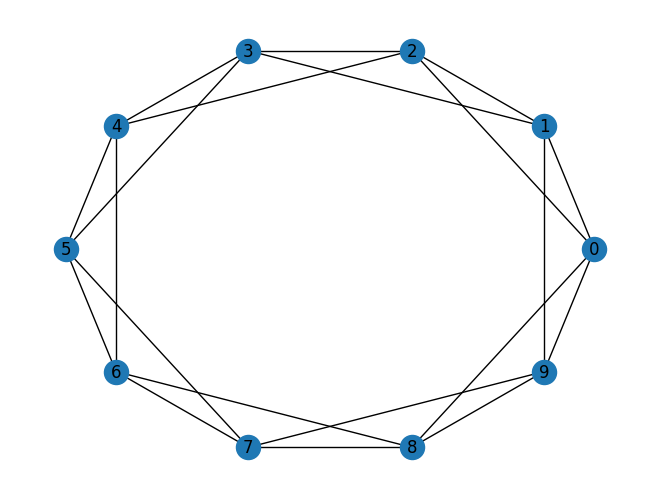

In [11]:
G7: nx.Graph = generate_ring_lattice(10)
# G7.clear_edges()
# nx.draw_circular(G7, with_labels=True)

for node in G7.nodes():
    nearest_nodes = get_nearest_nodes(G7, node, 2)
    # G7 = connect_nodes(G7, node, nearest_nodes)
    print(
        "Node:",
        node,
        "Nearest nodes:",
        nearest_nodes,
        "Total node count:",
        len(G7.nodes()),
        "Degree:",
        get_node_degree(G7, node),
    )
nx.draw_circular(G7, with_labels=True)

Node: 0 Nearest nodes: [8, 9, 1, 2] Degree: 4
Node: 1 Nearest nodes: [9, 0, 2, 3] Degree: 4
Node: 2 Nearest nodes: [0, 1, 3, 4] Degree: 4
Node: 3 Nearest nodes: [1, 2, 4, 5] Degree: 4
Node: 4 Nearest nodes: [2, 3, 5, 6] Degree: 4
Node: 5 Nearest nodes: [3, 4, 6, 7] Degree: 4
Node: 6 Nearest nodes: [4, 5, 7, 8] Degree: 4
Node: 7 Nearest nodes: [5, 6, 8, 9] Degree: 4
Node: 8 Nearest nodes: [6, 7, 9, 0] Degree: 4
Node: 9 Nearest nodes: [7, 8, 0, 1] Degree: 4


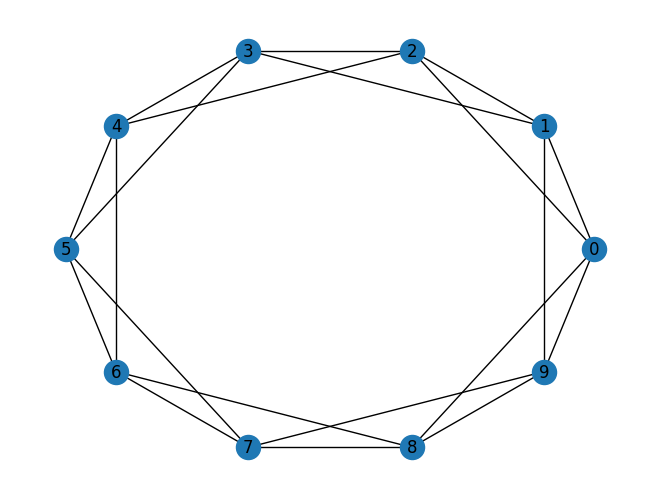

In [12]:
G8 = generate_ring_lattice(10, False)
for i in G8.nodes():
    nearest_nodes = get_nearest_nodes_without_edges(G8, i, 4)
    G8 = connect_nodes(G8, i, nearest_nodes)
    print(
        "Node:", i, "Nearest nodes:", nearest_nodes, "Degree:", get_node_degree(G8, i)
    )

nx.draw_circular(G8, with_labels=True)
plt.show()

### Übung 3 Create WS Graph by Rewiring

4.0

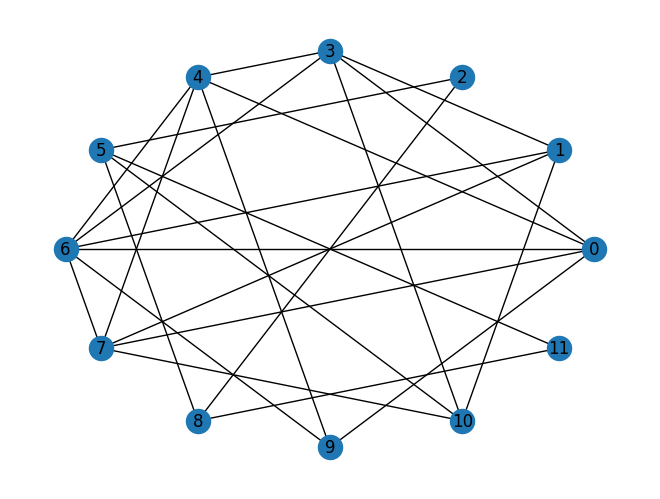

In [13]:
# start with ring lattice graph
G9 = generate_ring_lattice(12, with_edges=True)

G9 = watts_strogath_rewire(G9, 1)
nx.draw_circular(G9, with_labels=True)
# nx.draw(G9, with_labels=True)

average_node_degree(G9)

### Übung 4 mittlere Grad eines Knotens

Avg mean edge degrees for p = 0.0: 4.0
Avg mean edge degrees for p = 0.1: 4.0
Avg mean edge degrees for p = 0.2: 4.0
Avg mean edge degrees for p = 0.3: 4.0
Avg mean edge degrees for p = 0.4: 4.0
Avg mean edge degrees for p = 0.5: 4.0
Avg mean edge degrees for p = 0.6: 4.0
Avg mean edge degrees for p = 0.7: 4.0
Avg mean edge degrees for p = 0.8: 4.0
Avg mean edge degrees for p = 0.9: 4.0
Avg mean edge degrees for p = 1.0: 4.0


Text(0.5, 1.0, 'Mean of average node degrees for different chances of rewiring')

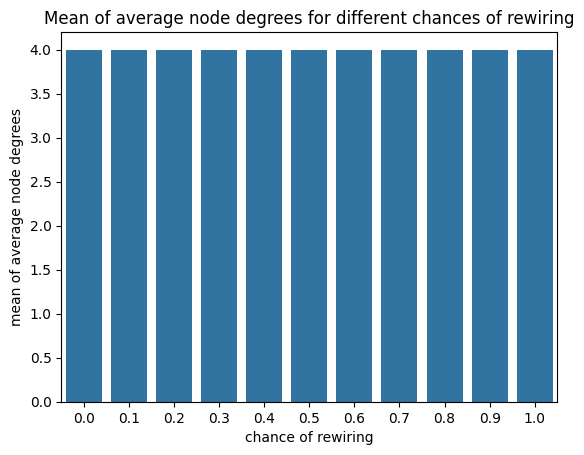

In [14]:
n_nodes = 10
n_reps_per_10_percent = 10

# Dict with keys as p values and values as list of maximum edge counts
mean_avg_node_degrees: Dict[float, List[int]] = {}

# For each 10 percent do n_reps_per_10_percent repetitions of generating and rewiring graphs
for p in range(0, 101, 10):
    mean_avg_node_degrees[p / 100] = []
    for i in range(n_reps_per_10_percent):
        G_temp = generate_ring_lattice(n_nodes, True)
        G_temp = watts_strogath_rewire(G_temp, p)
        mean_avg_node_degrees[p / 100].append(average_node_degree(G_temp))

    # print the average of the average of node degrees
    print(
        f"Avg mean edge degrees for p = {p / 100}:",
        sum(mean_avg_node_degrees[p / 100]) / len(mean_avg_node_degrees[p / 100]),
    )

# plot as bar plot with seaborn.
sns.barplot(
    x=list(mean_avg_node_degrees.keys()),
    y=[sum(values) / len(values) for values in mean_avg_node_degrees.values()],
)
plt.xlabel("chance of rewiring")
plt.ylabel("mean of average node degrees")
plt.title("Mean of average node degrees for different chances of rewiring")